Parsed with column specification:
cols(
  Area = col_double(),
  MajorAxisLength = col_double(),
  MinorAxisLength = col_double(),
  Eccentricity = col_double(),
  ConvexArea = col_double(),
  Extent = col_double(),
  Perimeter = col_double(),
  Class = col_character()
)



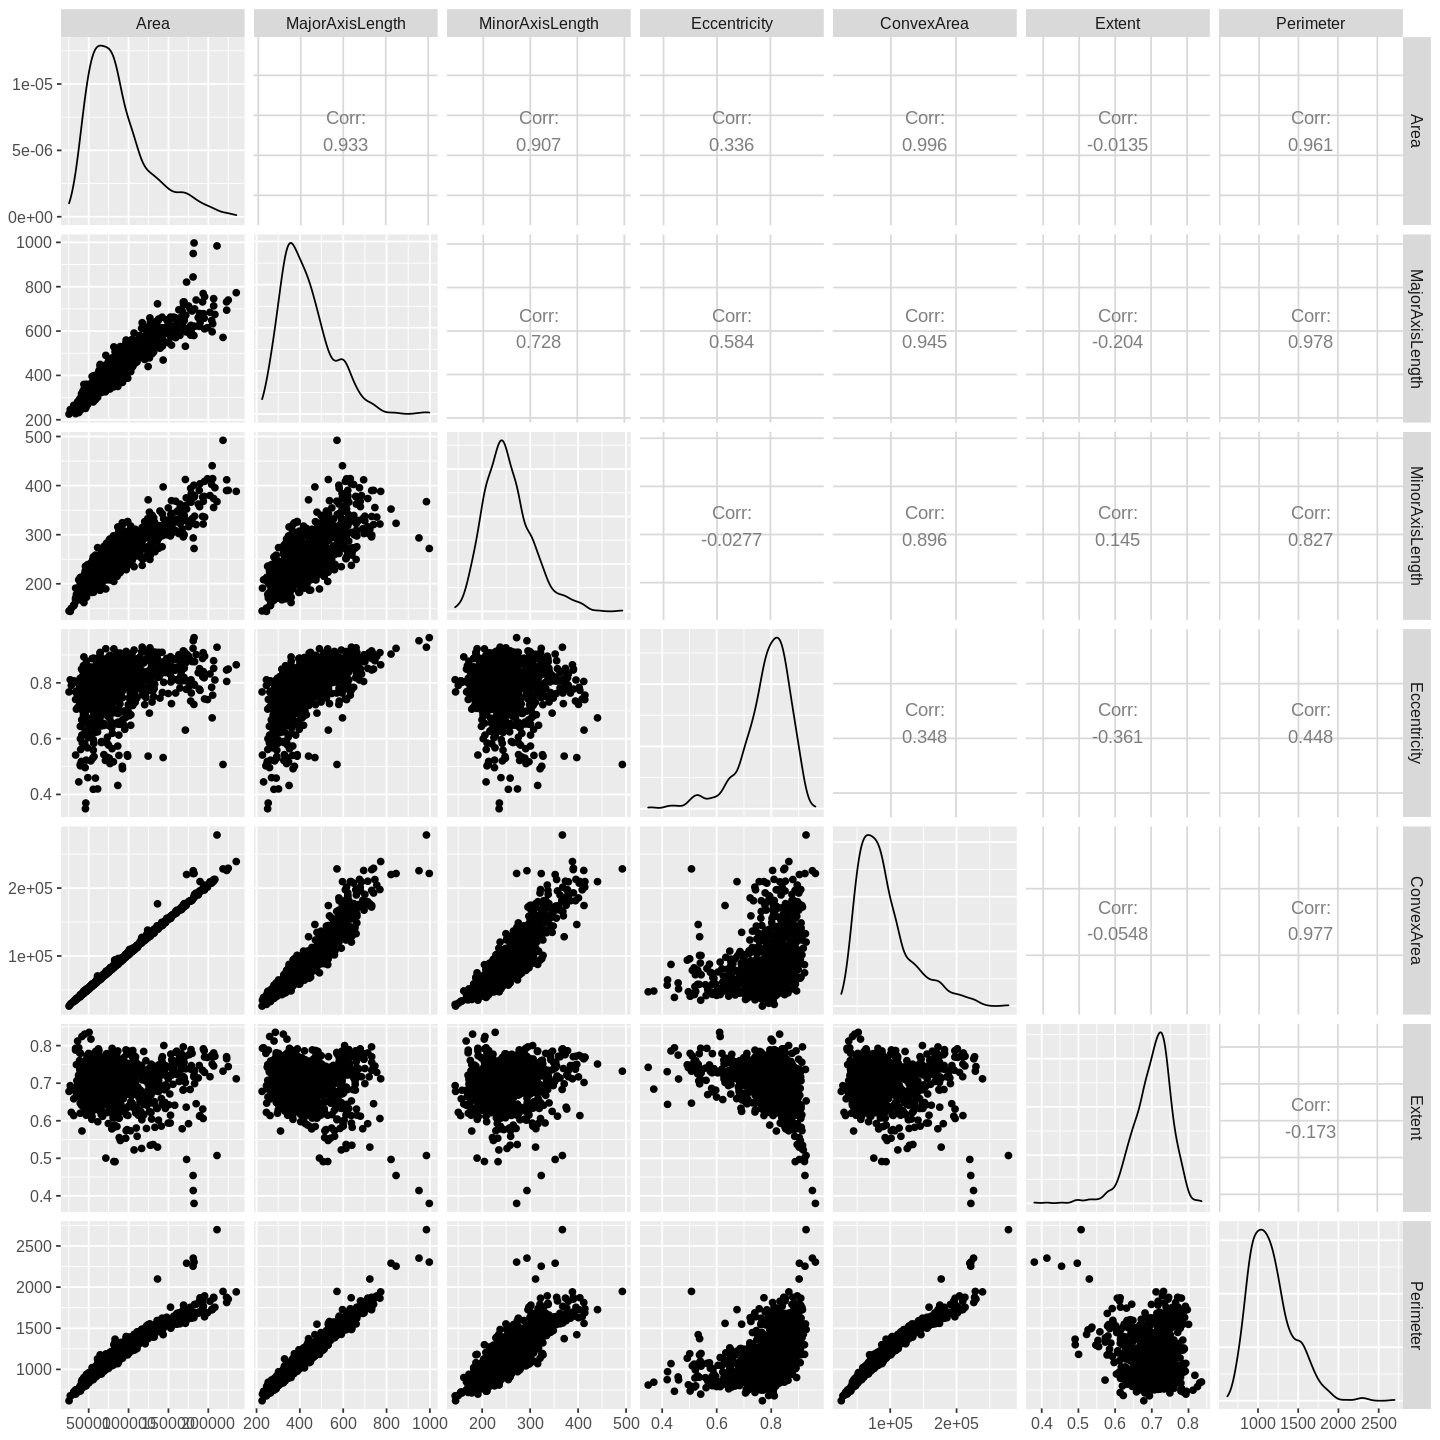

In [15]:
# downloading libraries
library(tidyverse)
library(repr)
library(GGally)
library(broom)
# options(repr.matrix.max.rows = 6)
options(repr.plot.height = 12, repr.plot.width = 12)


# seed value
set.seed(5805)

# ggpairs
raisin_data <- read_csv("https://github.com/dylankim990/DSCI100_Group_2/raw/main/data/Raisin_Dataset.csv") %>% 
    mutate(Class = as_factor(Class))

scaled_raisin_data <- raisin_data %>%
    select(Area:Perimeter) %>%
    mutate(across(everything(), scale))

raisin_data_predictors <- raisin_data %>%
    select(Area:Perimeter)

raisin_pairs <- raisin_data_predictors %>%
    ggpairs() + 
    theme(text = element_text(size = 12))

raisin_pairs

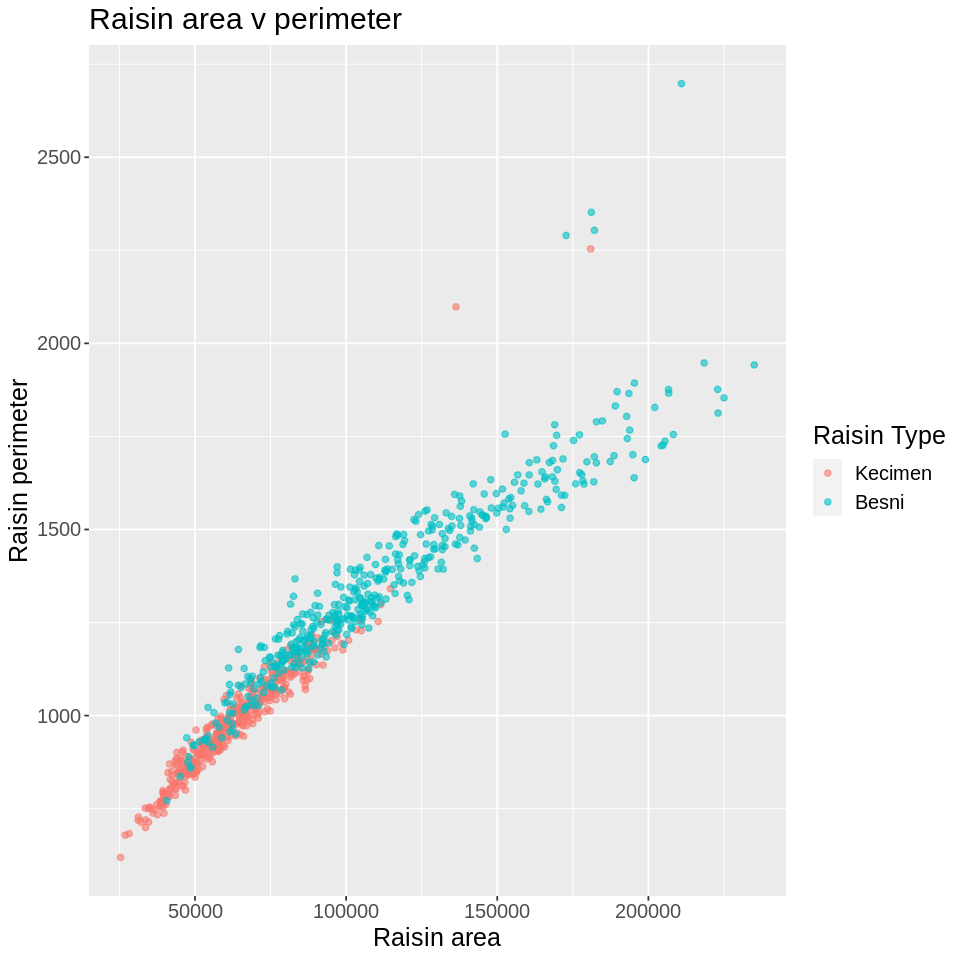

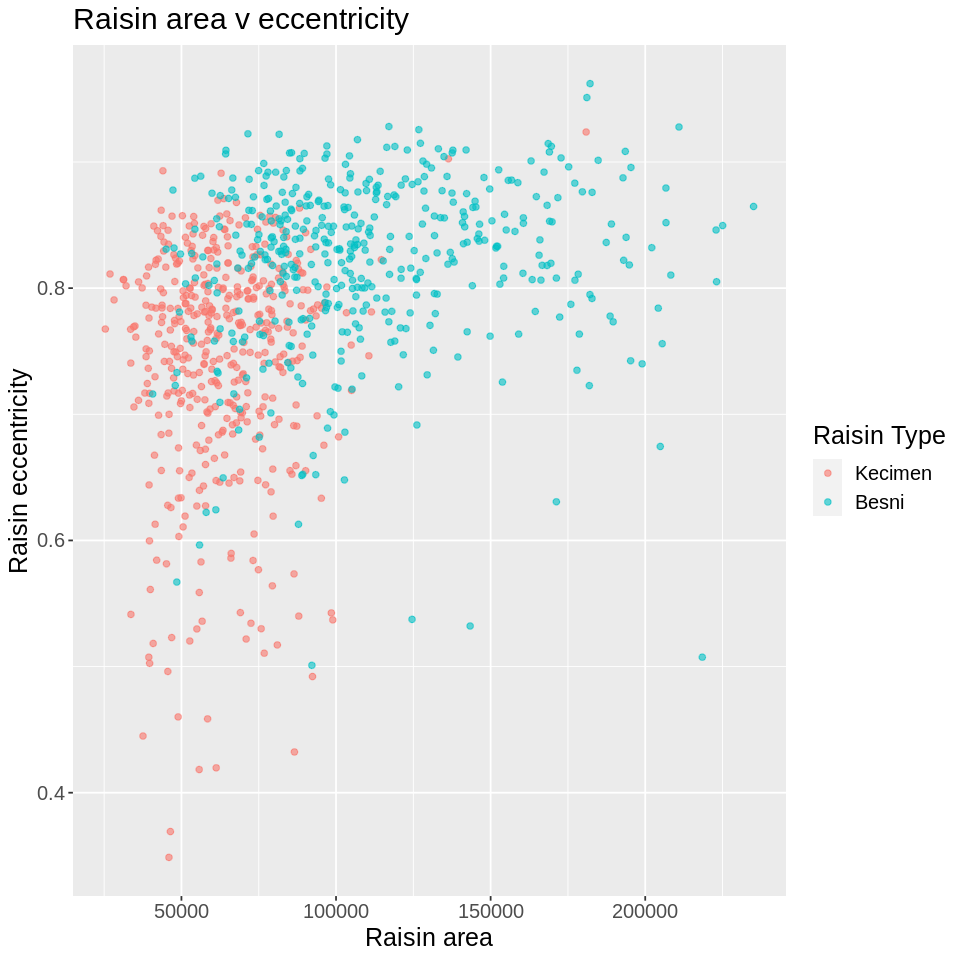

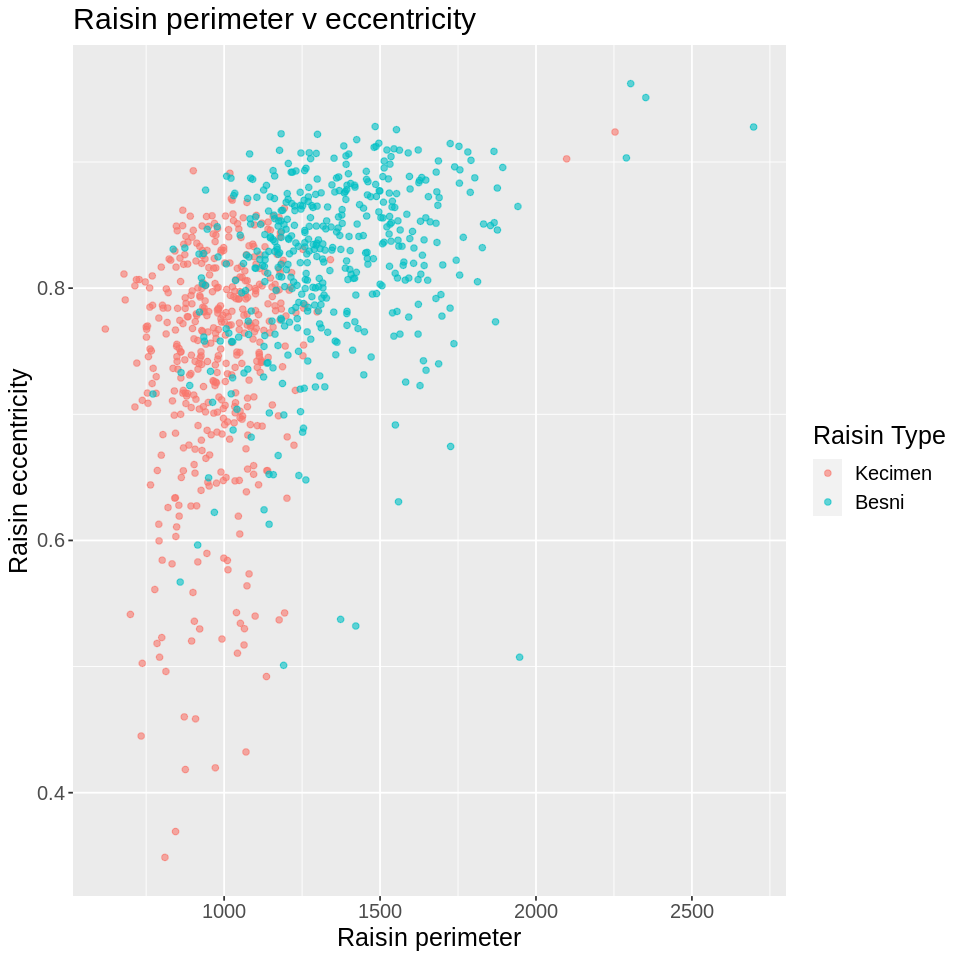

In [13]:
# downloading libraries
library(tidyverse)
library(repr)
library(GGally)
library(broom)
# options(repr.matrix.max.rows = 6)
options(repr.plot.height = 8, repr.plot.width = 8)


# setting seed
set.seed(5805)

# scatter plot: Area v Perimeter
area_perimeter_plot <- raisin_data %>%
    ggplot(aes(x = Area, y = Perimeter, color = Class)) + 
    geom_point(alpha = 0.6) + 
    labs(x = "Raisin area", 
         y = "Raisin perimeter", 
         title = "Raisin area v perimeter",
         color = "Raisin Type") +
    theme(text = element_text(size = 15))

area_perimeter_plot

# scatter plot: Area v Eccentricity
area_eccentricity_plot <- raisin_data %>%
    ggplot(aes(x = Area, y = Eccentricity, color = Class)) + 
    geom_point(alpha = 0.6) + 
    labs(x = "Raisin area", 
         y = "Raisin eccentricity", 
         title = "Raisin area v eccentricity",
         color = "Raisin Type") +
    theme(text = element_text(size = 15))


area_eccentricity_plot

# scatter plot: Perimeter v Eccentricity 
perim_eccentricity_plot <- raisin_data %>%
    ggplot(aes(x = Perimeter, y = Eccentricity, color = Class)) + 
    geom_point(alpha = 0.6) + 
    labs(x = "Raisin perimeter", 
         y = "Raisin eccentricity", 
         title = "Raisin perimeter v eccentricity",
         color = "Raisin Type") +
    theme(text = element_text(size = 15))



perim_eccentricity_plot

Firstly, I started off by making a ggpairs visualization in order to be able to build a scatterplot matrix. With this, we would be able to visualize (within a single diagram) each pair of numeric variables and the way they interact with each other, with the Pearson correlation and variable distribution also clearly stated. This was done in order to gain a deeper understanding of the data and it also allowed us to be able to identify correlations and different kinds of relationships between the variables. However, one flaw was that this would no allow us to know what type (Class) of raisin were plotted, it was simply plotting all the numerical data in the dataset (no distinction between Class). So, after we did some data analysis and prime predictor identification, we found that the predictors that would provide the most accurate predictions were Area, Perimeter, and Eccentricity. Now that we knew this, we decided to proceed and create scatterplots of the relatinoships and correlations between these specific three variables. This was done to gain an even better understanding of the variables that would become our predictors, while at the same time being able to identify what type of raisin (Class) was being plotted and what differences the types of raisins had in regards to these variables. To do this, we utilized the ggplot() function and since there were only three predictor variables, we were able to create scatterplots for each posible combination of two variables: Area v Perimeter, Area v Eccentricity, and Perimeter v Eccentricity.

,name,value
,<chr>,<dbl>
1,Area,8.752400e+04
2,MajorAxisLength,4.422460e+02
3,MinorAxisLength,2.532912e+02
4,Eccentricity,8.197384e-01
5,ConvexArea,9.054600e+04
6,Extent,7.586506e-01


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



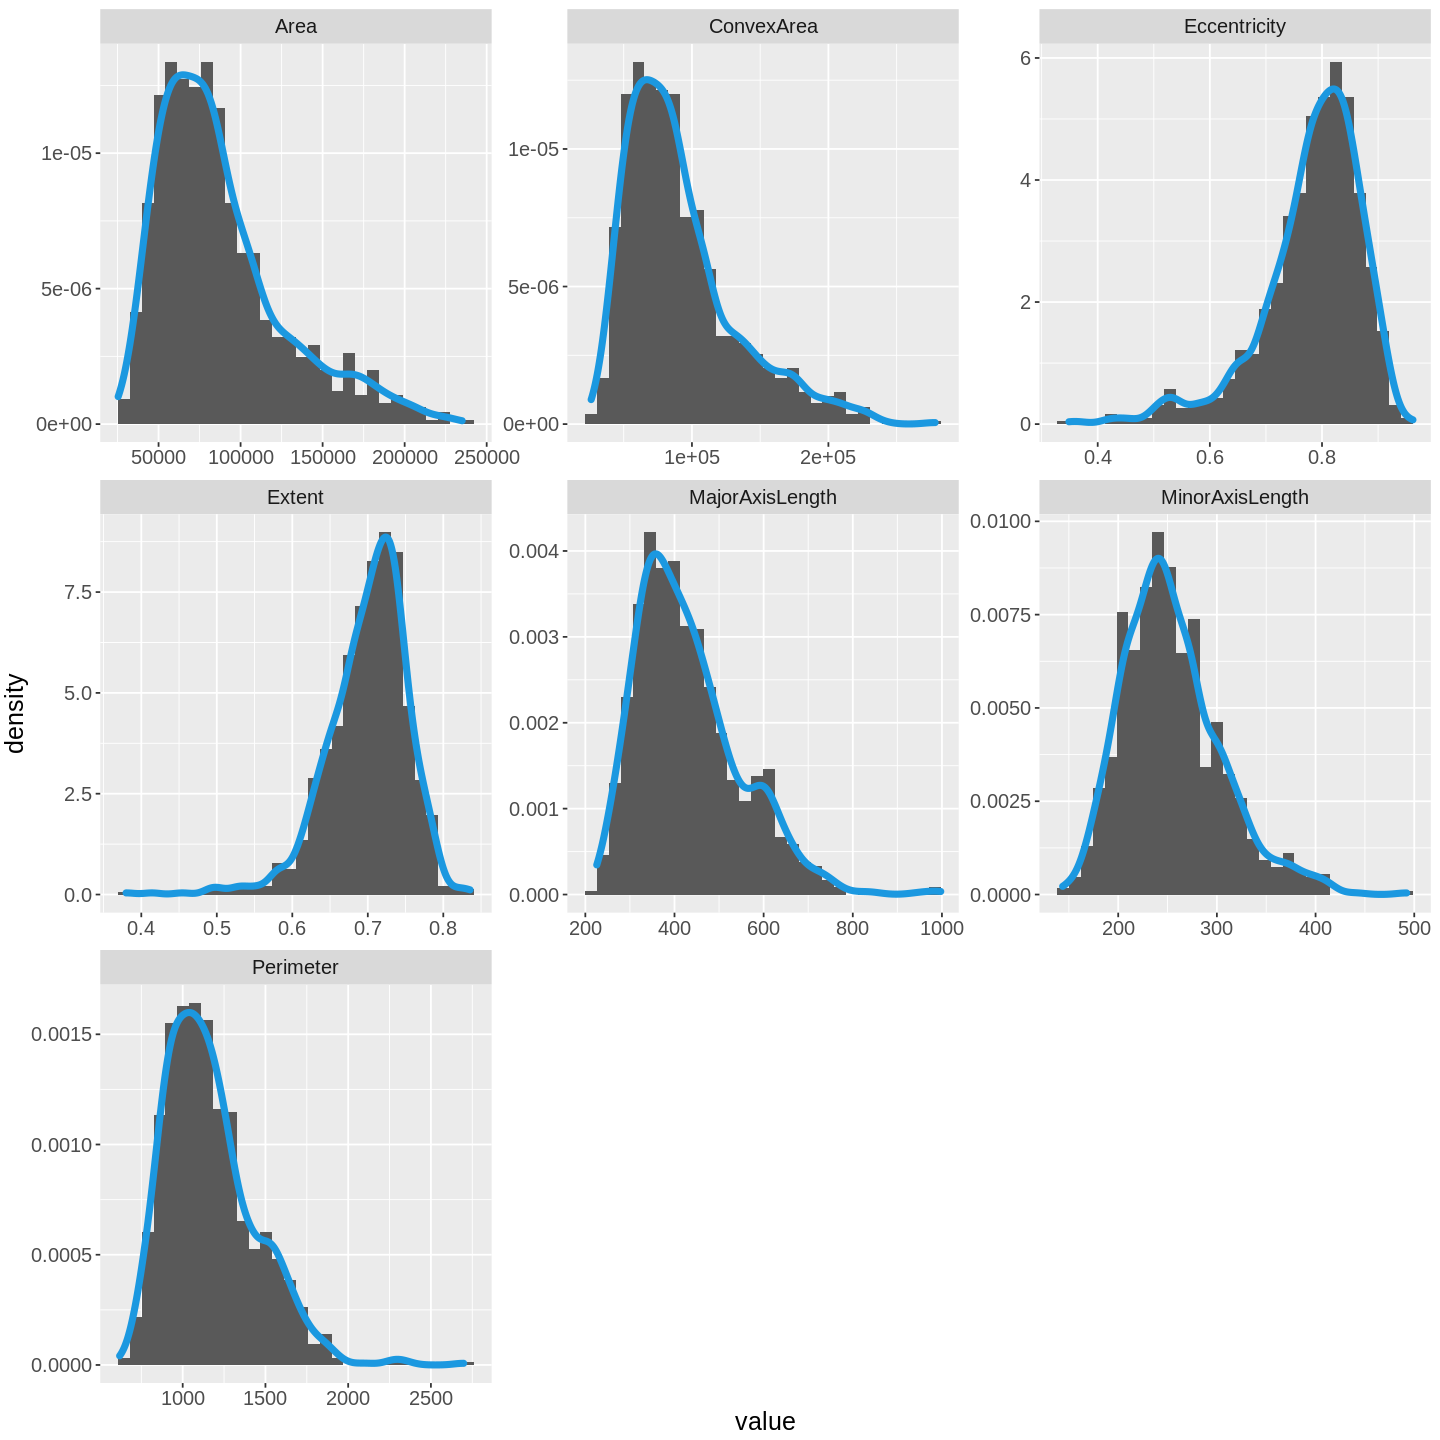

In [11]:
# downloading libraries
library(tidyverse)
library(repr)
library(GGally)
library(broom)
library(ggplot2)
library(tidyr)
# options(repr.matrix.max.rows = 6)
options(repr.plot.height = 12, repr.plot.width = 12)


# setting seed
set.seed(5805)

numerical_raisin_data <- raisin_data %>%
    select(Area:Perimeter)

raisin_data_long <- numerical_raisin_data %>%                        
  pivot_longer(colnames(numerical_raisin_data)) %>% 
  as.data.frame()

head(raisin_data_long)

# distribution plot 
distribution_plot <- ggplot(raisin_data_long, aes(x = value)) +    # Draw histogram & density
  geom_histogram(aes(y = ..density..)) + 
  geom_density(col = "#1b98e0", size = 2) + 
  facet_wrap(~ name, scales = "free") +
  theme(text = element_text(size = 15))

distribution_plot